In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)


X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets


merged_df = pd.concat([X, y], axis=1)

print(merged_df.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [5]:
merged_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

This is an interesting and fun dataset, with some great opportunities for insights. Here, we have a few items that are important to consider. Based on the description of this data, lets consider the following variables:

1) Administrative - Pertains to the type of webpage visited, and the count.
2) Administrative Duration - Represents the duration of time spent on the website.
3) Informational - Pertains to the type of webpage visited (informational), and the count.
4) Informational Duration - duration of time spent on these types of websites.
5) Product Related - This would be a product related website.
6) Product Duration of time on a product related website.
7) Bounce Rates - % of time the user left after visiting the first page. 
8) Exit Rates - % of time the webpage was the last one visited. 
9) Page Values - The average value for a web page that a user visited before completing an e-commerce transaction
10) Special Day - Closeness of purchase to a special day
11) Month - Month of purchase.
12) Operating Systems - OS of the user. 
13) Browser - Browser type
14) Region - Region of the purchaser
15) Traffic Type - Source type 
16) Visitor Type - returning or new customer. 
17) Weekend - Purchase on a weekend or weekday. 
18) Revenue - Amount of purchase. 

The data can be used to predict revenue values, or % opf liklihood that revenue of any sort will be generated based on some or all of the remaining variables. It also presents the opportunity to consider aggregate variables, or developing purchaser types based on user behavior. Further, there are some opportunities here to "think beyond the box", as some of the variable measures themselves are not all encompassing. For example, while the count of visitation and duration of time spent on a website might indicate user behavior, it could also simply reflect a user leaving their computer with the webpage open. Indirect measures like these could indicate 1) a user leaves the webpage open because they're geneuinly interested in a product, and doesn't want to lose track of the website 2) A user simply leaves the website open with no liklihood of purchasing. So, it would be tough to know, at face value, the real quality of the data in indicating real user behavior, though, this a common barrier with behavioral data. 
    Some other dimensions to consider are if the potential predictor variables are also causal variables, in any way. For example, while exit rates might be predictive of purchasing behavior, it would be tougher to demonstrate that it is a cause of purchase behavior. Other variables like whether or not a purchase was made on a weekend, browser type, visitor type are interesting variables, though not necessarily causal. Finally, there is no specific user profile data available to offer more individualized analysis of user behavior within this data set. User types can be made based on returning customers, weekend customers, users who purchase on holidays, or folks who simply like to view specific products without actually purchasing items.
    Causal analysis of purchasing behavior, in this case, could be beyond the prospects of business interests. Simply predicting purchase based on user factors could suffice. For now, lets consider some EDA. 



<function matplotlib.pyplot.show(close=None, block=None)>

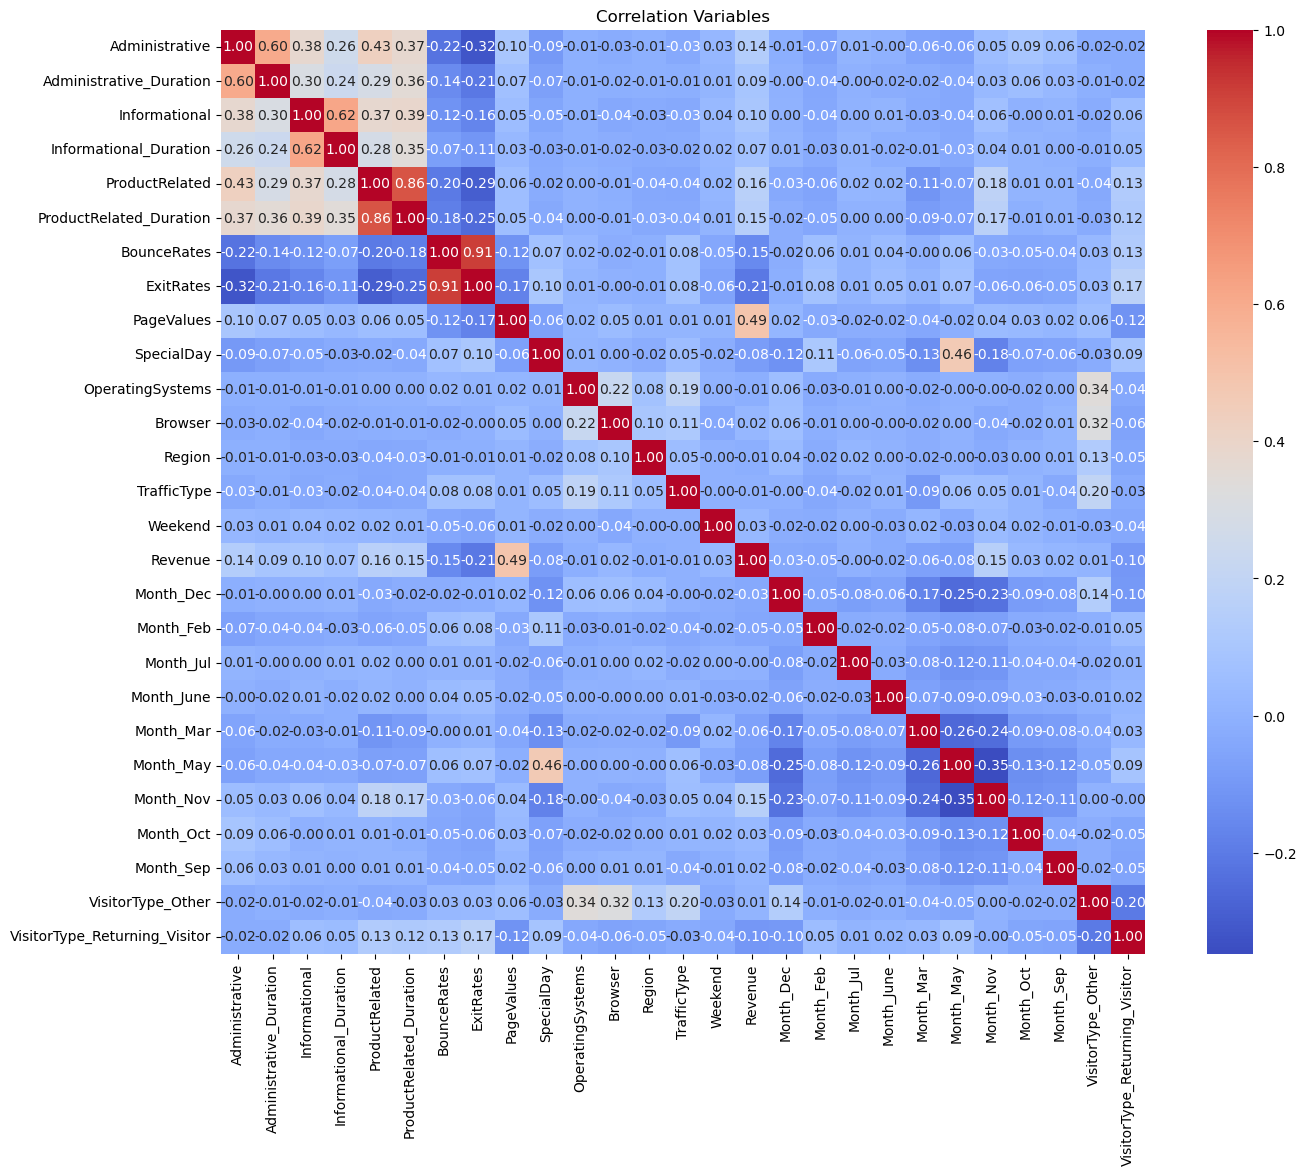

In [11]:
df_encoded = pd.get_dummies(merged_df, drop_first = True)
corr = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap = "coolwarm", square=True, cbar=True)
plt.title("Correlation Variables")
plt.tight_layout
plt.show

In [ ]:
Some weak correlations exist within the dataset, with stronger correlations being between different measures of the same variable (i.e. count of website vs. duration). One notable moderation correlation exists between page values and revenue. This may benefit from a further analysis of how revenue is distributed across these variables.   

<Axes: xlabel='Revenue', ylabel='count'>

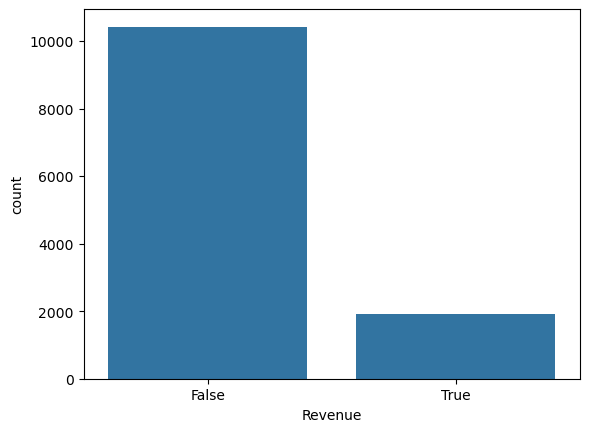

In [157]:
sns.countplot(data=merged_df, x="Revenue")

In [163]:
print(merged_df['Revenue'].value_counts())
purchase_rate = merged_df['Revenue'].mean()
print(f"purchase likelihood: {purchase_rate * 100:.2f}%")

Revenue
False    10422
True      1908
Name: count, dtype: int64
purchase likelihood: 15.47%


<Axes: xlabel='OperatingSystems', ylabel='count'>

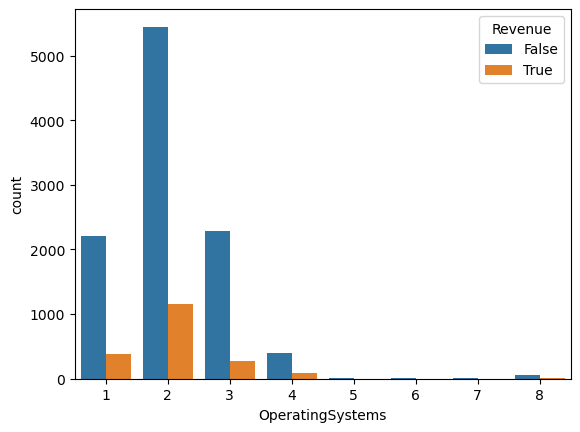

In [153]:
sns.countplot(data=merged_df, x="OperatingSystems", hue="Revenue")

sns.barplot(data=merged_df, x="OperatingSystems", hue="Revenue") 

<Axes: xlabel='OperatingSystems', ylabel='Revenue'>

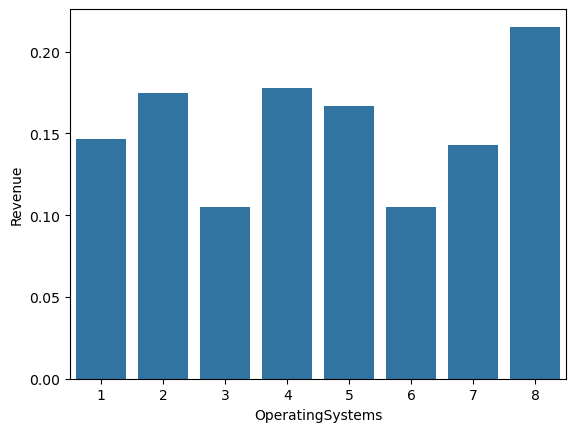

In [222]:
sns.barplot(data=merged_df, x="OperatingSystems", y="Revenue", errorbar=None)

Factors to consider here is that while users on operating system 8 are more likely to make a purchase, the represent a lower amount of purchases than users on other operating systems. Users on operating system 2 seem to be more lucrative (hard to tell without a respective monetary value for revennue), with the third highest conversion rate. 

<Axes: xlabel='Informational', ylabel='count'>

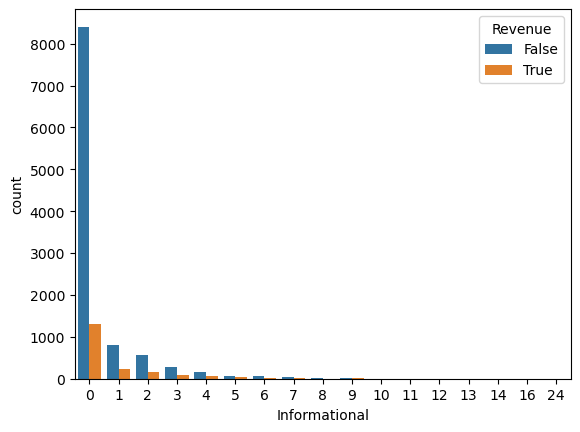

In [187]:
sns.countplot(data=merged_df, x="Informational", hue = "Revenue")

<Axes: xlabel='Informational_Duration', ylabel='Count'>

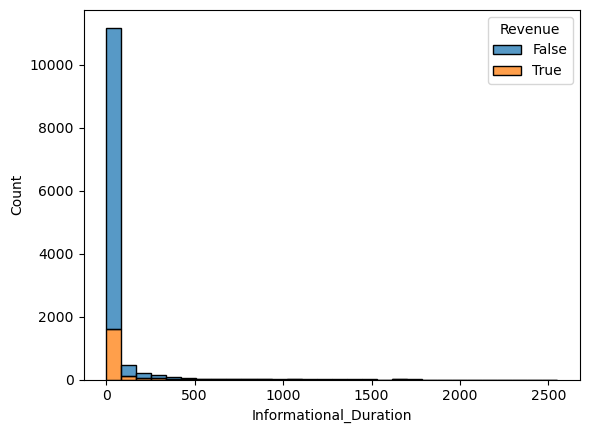

In [193]:
sns.histplot(data=merged_df, x="Informational_Duration", hue="Revenue", bins=30, kde=False, multiple="stack")

<Axes: xlabel='Revenue', ylabel='Informational_Duration'>

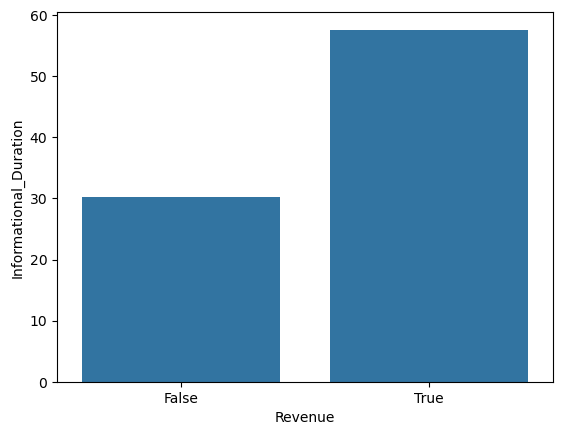

In [195]:
sns.barplot(data=merged_df, x="Revenue", y="Informational_Duration", errorbar=None)

<Axes: xlabel='Revenue', ylabel='Informational'>

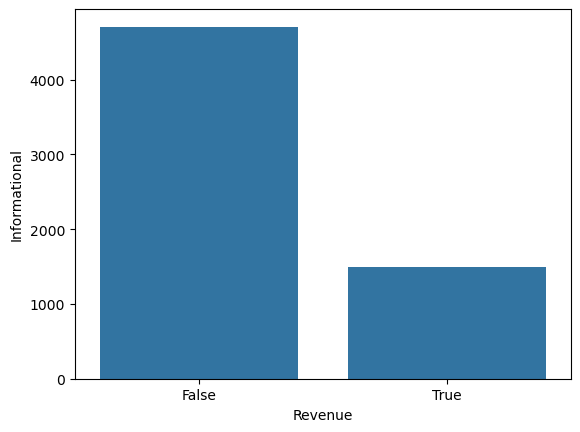

In [197]:
sns.barplot(data=merged_df, x="Revenue", y="Informational", estimator=np.sum, errorbar=None)

Some interesting features to consider about inforational webpages here, that could indicate some qualities of user behavior. In general, it seems that more sales associated with no visits to informational pages. Meaning that users typically bypass these pages when making a purchase. However, for those users who do visit informational webpages, visiting for longer durations lead to increase in likelihood of sales. Lets consider the same appraoch for administrative websites. 

<Axes: xlabel='Administrative', ylabel='Administrative_Duration'>

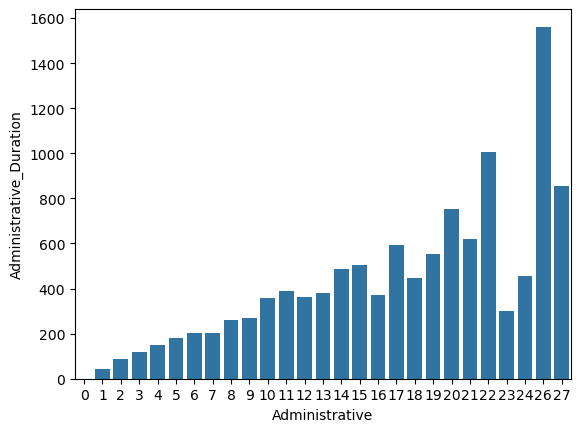

In [177]:
sns.barplot(data=merged_df, x="Administrative", y="Administrative_Duration", errorbar=None)

<Axes: xlabel='Informational', ylabel='Informational_Duration'>

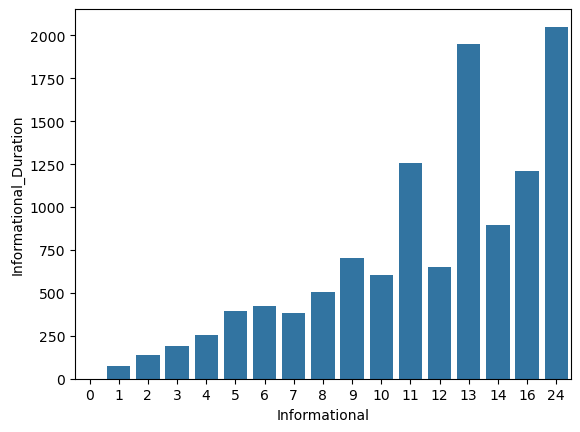

In [179]:
sns.barplot(data=merged_df, x="Informational", y="Informational_Duration", errorbar=None)

The informational and administrative variables are precarious in that they represent the number of content specific webpages a user visited. While this is partly informative, it still leaves some unknowns. For example, are the webpages counted as unique, or could a user revist the same webpage 24 times to be included in this count? Or, how are the differences in count from one session respective to that of another? Here, we only have a sample of sessions that included some visitation to informational content. 

In [ ]:
grouped_df=merged_df.groupby("Month")[Revenue].sort_values(ascending=False). 